In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

In [2]:
df = pd.read_json("../data/2020-03-29/GB/2020-03-29_GB_GB.json")
df.set_index(['state', 'county', 'category'], inplace=True)


In [3]:
# df.xs('workplace', axis=0, level=2, drop_level=False)
# df.query('county == "Overall"')

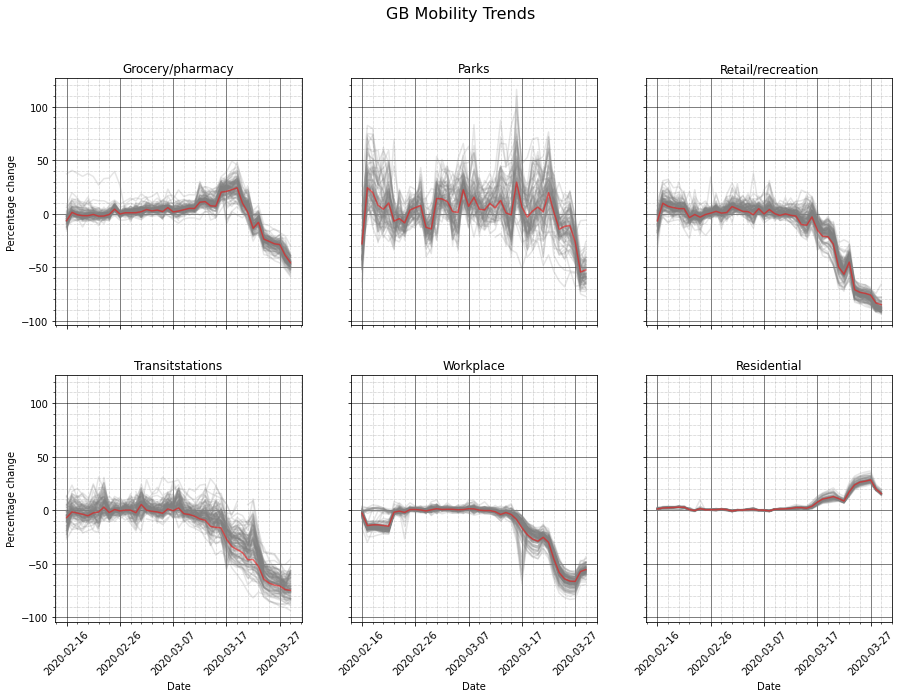

In [4]:
state = df.index.unique(level='state')
categories = df.index.unique(level='category')
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,10))

fig.suptitle(f'{state[0]} Mobility Trends', fontsize=16)

for ax, cat in zip(chain.from_iterable(axes), categories):
    df.query(f'category == "{cat}" &  county != "Overall"').T.plot(
        ax=ax,color="gray",
        alpha=0.2,
        legend=False,
        rot=45
    )
    df.query(f'category == "{cat}" &  county == "Overall"').T.plot(
        ax=ax,color="red",
        alpha=0.5,
        legend=False,
        rot=45
    )
    ax.set_title(f'{cat.capitalize()}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage change')
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.savefig(f'{state[0]}_plot.png', dpi=300)

In [7]:
df2 = pd.read_csv('../GB/2020-03-29_GB_GB_normal.csv')

In [8]:
df2

,state,county,category,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,...,25-02-2020,25-03-2020,26-02-2020,26-03-2020,27-02-2020,27-03-2020,28-02-2020,28-03-2020,29-02-2020,29-03-2020
0,GB,Ards And North Down,grocery/pharmacy,1.427,7.212,1.851,1.034,3.802,4.640,3.113,...,2.908,-25.589,-2.843,-25.598,1.521,-22.968,1.624,-22.749,-1.437,-40.311
1,GB,Ards And North Down,parks,5.040,4.579,10.040,3.125,12.112,3.289,19.638,...,3.765,-41.667,-9.375,-18.169,1.211,-47.149,-16.447,-45.253,-6.831,-59.644
2,GB,Ards And North Down,retail/recreation,4.735,3.083,3.910,6.706,3.017,2.192,1.741,...,1.095,-65.570,1.490,-66.810,1.868,-70.598,-0.577,-77.536,2.765,-81.545
3,GB,Ards And North Down,transitstations,5.208,-2.541,-5.609,0.820,-3.281,-3.064,-4.125,...,-8.013,-68.077,-0.820,-68.077,-4.101,-70.466,-7.659,-62.913,-7.219,-59.028
4,GB,Ards And North Down,workplace,NaN,1.251,0.600,0.901,1.663,1.766,2.083,...,-0.901,-68.144,-1.351,-70.755,-1.209,-70.782,1.284,-61.250,-0.417,-58.702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,GB,Worcestershire,parks,2.264,12.718,4.630,-4.529,1.204,32.454,3.255,...,-2.315,4.529,9.624,9.634,9.634,-16.750,-21.985,-54.253,-18.808,-45.667
575,GB,Worcestershire,residential,-1.346,-0.028,0.262,0.255,0.526,-0.230,-0.284,...,0.372,26.570,0.667,27.461,1.025,28.294,1.330,19.754,-0.272,14.863
576,GB,Worcestershire,retail/recreation,7.764,3.569,2.703,0.353,1.084,5.933,-0.587,...,-2.474,-77.231,-1.457,-78.027,1.300,-79.824,-1.079,-88.351,2.230,-89.563
577,GB,Worcestershire,transitstations,17.285,9.579,4.516,2.652,1.457,11.559,10.540,...,5.269,-59.229,6.777,-63.520,6.265,-66.149,10.445,-75.885,6.851,-74.372
